In [234]:
import matplotlib.pyplot as plt
from   dlsAnalyzer       import *

plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
dls               = dlsAnalyzer()
l                 = dls.loadExperiment("CleanedEMDSignal.csv","test")
d                 = dls.experimentsOri["test"] 

d.lambda0         = 635                #  Laser wavelength in nanometers
d.scatteringAngle = 90 / 180 * np.pi  #  Angle of detection in radians
d.getQ()                               #  Calculate the Bragg wave vector
d.createFittingS_space(0.09,1e6,200)   #  Discretize the decay rate space we will use for the fitting
# d.createFittingS_space(1,1e4,200)
d.setAutocorrelationData()             

## Autocorrelation curves

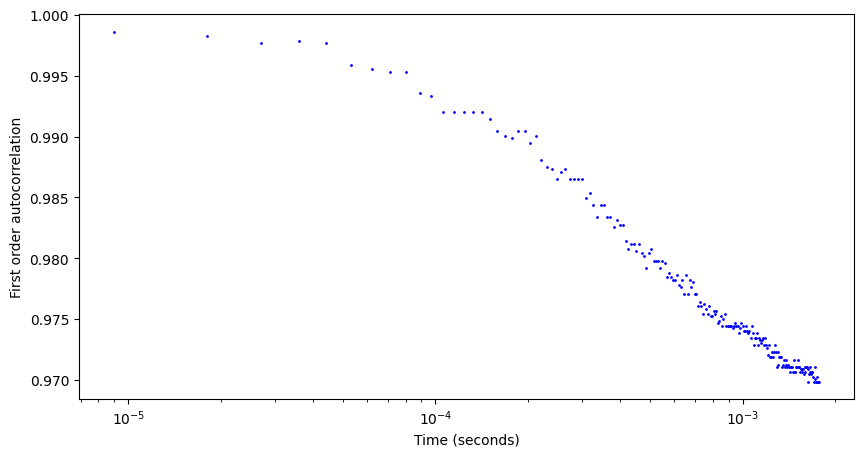

In [236]:
# Estimate the intercept of the second order autocorrelation curves
d.getBetaEstimate()   

# Compute  the first order autocorrelation curves
# Due to errors in measurement, same values can't be computed (negative sqrt)

d.getG1correlation()  

plt.xscale("log")

plt.plot(d.time,d.g1[:,0],'bo',markersize=1)
# plt.plot(d.time,d.g1[:,1],'bo',markersize=1)
# plt.plot(d.time,d.g1[:,2],'bo',markersize=1)
# plt.plot(d.time,d.g1[:,3],'bo',markersize=1)
plt.xlabel("Time (seconds)")
plt.ylabel("First order autocorrelation")
plt.show()

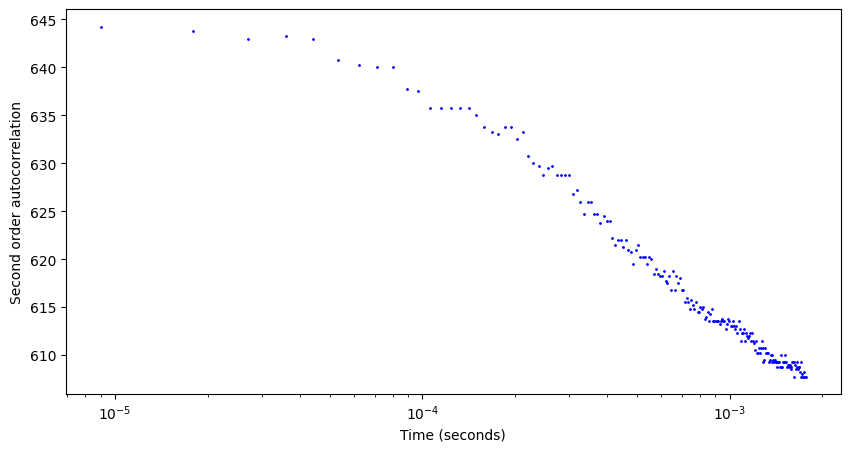

In [237]:
plt.xscale("log")
plt.plot(d.time,d.autocorrelation[:,0],'bo',markersize=1)
# plt.plot(d.time,d.autocorrelation[:,1],'bo',markersize=1)
plt.xlabel("Time (seconds)")
plt.ylabel("Second order autocorrelation")
plt.show()

## Fit the DLS data

In [238]:
d.getInitialEstimates()
d.getInitialEstimatesManyAlpha()
d.getOptimalAlphaLcurve()
d.getInitialEstimatesOptimalAlphaLcurve()
d.getInitialEstimatesManyAlpha()

## L-curve 

Text(0, 0.5, 'Log(penalty term)')

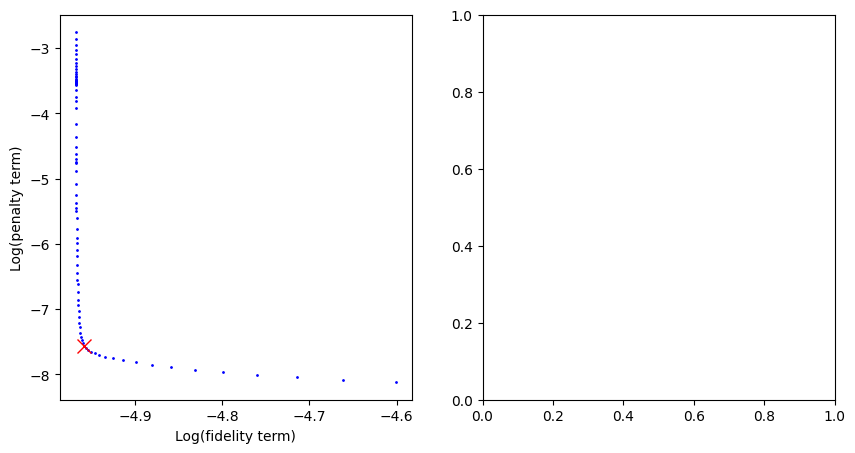

In [239]:
figure, axis = plt.subplots(1, 2)

axis[0].plot(np.log(d.curvesResidualNorm[:,0]),np.log(d.curvesPenaltyNorm[:,0]),'bo',markersize=1)
axis[0].plot(np.log(d.curvesResidualNorm[:,0])[d.alphaOptIdx[0]],
         np.log(d.curvesPenaltyNorm[:,0])[d.alphaOptIdx[0]],'x',color='red',markersize=10)

axis[0].set_xlabel("Log(fidelity term)")
axis[0].set_ylabel("Log(penalty term)")

# axis[1].plot(np.log(d.curvesResidualNorm[:,1]),np.log(d.curvesPenaltyNorm[:,1]),'bo',markersize=1)
# axis[1].plot(np.log(d.curvesResidualNorm[:,1])[d.alphaOptIdx[1]],
#          np.log(d.curvesPenaltyNorm[:,1])[d.alphaOptIdx[1]],'x',color='red',markersize=10)

# axis[1].set_xlabel("Log(fidelity term)")
# axis[1].set_ylabel("Log(penalty term)")

## Fitted curves

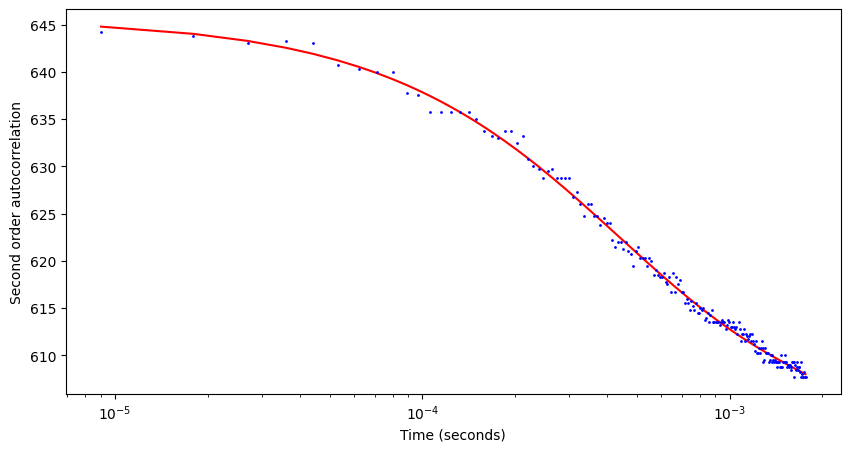

In [240]:
d.predictAutocorrelationCurves()

plt.xscale("log")

plt.plot(d.time,d.autocorrelationPredicted[:,0],'red')
# plt.plot(d.time,d.autocorrelationPredicted[:,1],'red')
plt.plot(d.time,d.autocorrelation[:,0],'bo',markersize=1)
# plt.plot(d.time,d.autocorrelation[:,1],'bo',markersize=1)

# plt.plot(d.time,d.autocorrelationPredicted[:,2],'red')
# plt.plot(d.time,d.autocorrelation[:,2],'bo',markersize=1)

# plt.plot(d.time,d.autocorrelationPredicted[:,3],'red')
# plt.plot(d.time,d.autocorrelation[:,3],'bo',markersize=1)

plt.xlabel("Time (seconds)")
plt.ylabel("Second order autocorrelation")
plt.show()

## Hydrodynamic radius distribution

C:\Users\jmste\AppData\Local\Temp\ipykernel_27360\1191501617.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dia = int(d.hrs[max1]) * 2


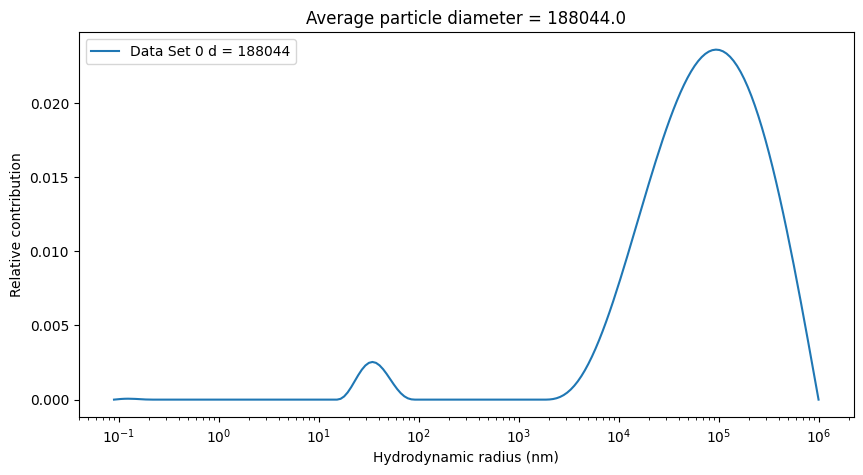

In [243]:
plt.xscale("log")

vals = []
data_range = [0, 200]

for data_set in range( len(d.autocorrelation[0])):
    max1 = np.where(d.contributionsGuess[data_set] == max(d.contributionsGuess[data_set][data_range[0]:data_range[1]]))
    dia = int(d.hrs[max1]) * 2
    vals.append(dia)
    plt.plot(d.hrs[data_range[0]:data_range[1]],d.contributionsGuess[data_set][data_range[0]:data_range[1]], label=('Data Set ' + str(data_set) + " d = " + str(dia)))
    
plt.xlabel("Hydrodynamic radius (nm)")
plt.ylabel("Relative contribution")
plt.title("Average particle diameter = " + str(np.average(vals)))
plt.legend()
plt.show()